1.0
0.09999999999999998
0.009999999999999995
0.0009999999999999992
1.0
0.4996
-0.15020000000000003
-0.27494
1.0
0.56008
0.39001600000000003
-0.204992


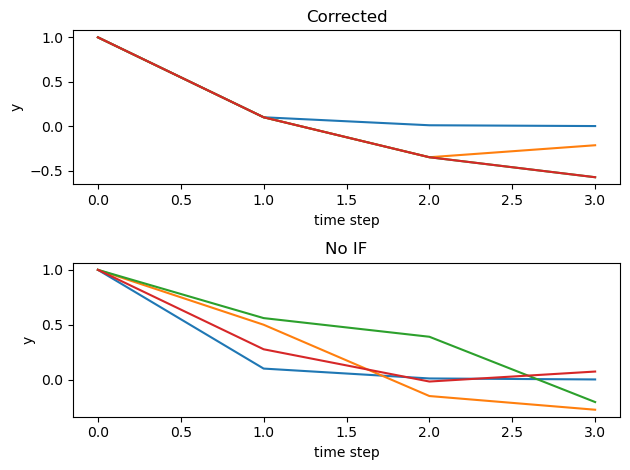

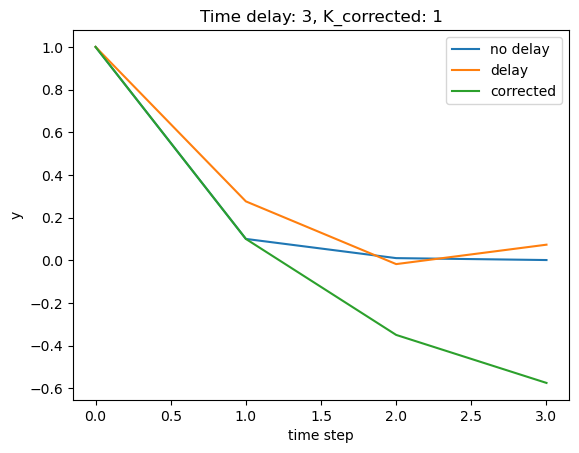

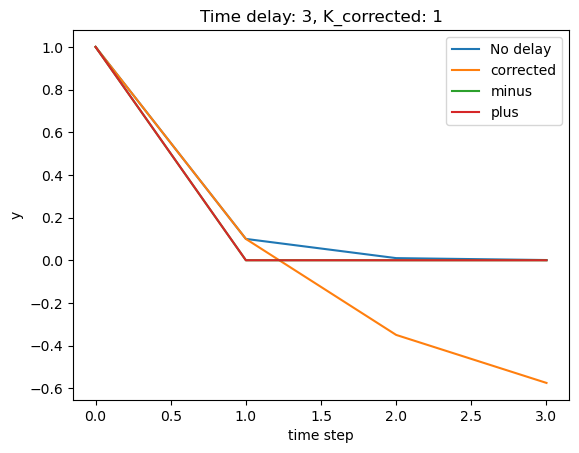

In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Initialization
# Length of simulation (time steps)
simlen = 4 
# Output
y_nodelay = np.zeros((simlen))
y_delayed = np.zeros((simlen))
y_corrected = np.zeros((simlen))
y_minus = np.zeros((simlen))
y_plus = np.zeros((simlen))

y_noif = np.ones((simlen))
# Target
target = 0

# Controller gain
K = 1.0
K_corrected = 1
# diff = 0.9
# K_plus = K + diff
# K_minus = K - diff

# K_plus = K_corrected*(1+diff)
# K_minus = K_corrected*(1-diff)

# Set first output
y_nodelay[0] = 1
y_delayed[0] = 1
y_corrected[0] = 1
y_minus[0] = 1
y_plus[0] = 1

y_noif[0] = 1

# TODO define the time delay
# delay_time = 5

time = range(simlen)

## Simulation
for delay_time in [0, 1, 2, 3]:
    for t in range(simlen-1):
        # Compute output
        # TODO include the time delay
        u_nodelay = K * (target - y_nodelay[t])
        y_nodelay[t+1]=0.5*y_nodelay[t] + 0.4*u_nodelay # 1st order dynamics

        u_delayed = K * (target - y_delayed[t-delay_time])
        y_delayed[t+1]=0.5*y_delayed[t] + 0.4*u_delayed # 1st order dynamics

        if t < delay_time:
            u_corrected = K_corrected * (target - y_corrected[0])
        else:
            u_corrected = K_corrected * (target - y_corrected[t-delay_time])
        
        y_corrected[t+1]=0.5*y_corrected[t] + 0.4*u_corrected # 1st order dynamics

        u_noif = K_corrected * (target - y_noif[t-delay_time])
        print(y_noif[t-delay_time])
        y_noif[t+1]=0.5*y_noif[t] + 0.4*u_noif

        # u_minus = (K_minus) * (target - y_minus[t-delay_time])
        # y_minus[t+1]=0.5*y_minus[t] + 0.4*u_minus # 1st order dynamics

        # u_plus = (K_plus) * (target - y_plus[t-delay_time])
        # y_plus[t+1]=0.5*y_plus[t] + 0.4*u_plus # 1st order dynamics

        ## Plot
    
    # Plot both the y_corrected and y_noif into two seperate plots using plt.subplot
    
        # Plot y_corrected
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    plt.plot(time, y_corrected)
    plt.title('Corrected')
    plt.xlabel('time step')
    plt.ylabel('y')

    # Plot y_noif
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
    plt.plot(time, y_noif)
    plt.title('No IF')
    plt.xlabel('time step')
    plt.ylabel('y')

    plt.tight_layout()  # Adjusts subplot parameters for a tight layout
    
plt.show()

## Plot

plt.plot(time, y_nodelay)
plt.plot(time, y_delayed)
plt.plot(time, y_corrected)
plt.title(f"Time delay: {delay_time}, K_corrected: {K_corrected}")
plt.legend(['no delay', 'delay', 'corrected'])
plt.xlabel('time step')
plt.ylabel('y')
plt.show()

plt.plot(time, y_nodelay)
plt.plot(time, y_corrected)
plt.plot(time, y_minus)
plt.plot(time, y_plus)
plt.title(f"Time delay: {delay_time}, K_corrected: {K_corrected}")
plt.legend(['No delay','corrected', 'minus', 'plus'])
plt.xlabel('time step')
plt.ylabel('y')
plt.show()